In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.describe(include='all')

,movieId,title,genres
count,10329.000000,10329,10329
unique,NaN,10327,938
top,NaN,War of the Worlds (2005),Drama
freq,NaN,2,1385
mean,31924.282893,NaN,NaN
std,37734.741149,NaN,NaN
min,1.000000,NaN,NaN
25%,3240.000000,NaN,NaN
50%,7088.000000,NaN,NaN
75%,59900.000000,NaN,NaN


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [7]:
ratings.describe(include='all')

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [8]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [9]:
movies.shape

(10329, 3)

In [10]:
movies['genres']= movies['genres'].str.replace('|',' ')

In [11]:
len(movies.movieId.unique())

10329

In [12]:
len(ratings.movieId.unique())

10325

In [13]:
ratings_f = ratings.groupby('userId').filter(lambda x: len(x) >=100)
movie_list_rating =ratings_f.movieId.unique().tolist()

In [14]:
len(ratings_f.movieId.unique())/len(movies.movieId.unique()) * 100

98.84790395972504

In [15]:
len(ratings_f.movieId.unique())/len(ratings.movieId.unique()) * 100

98.8861985472155

In [16]:
movies = movies[movies.movieId.isin(movie_list_rating)]

In [17]:
movies.shape

(10210, 3)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer 

# Vectorizing pre-processed movie plots using TF-IDF 
tfidfvec = TfidfVectorizer(stop_words='english') 
tfidf_movieid = tfidfvec.fit_transform((movies["genres"]))
tf_df=pd.DataFrame(tfidf_movieid.toarray(), index=movies.index.tolist())


print(tf_df.shape)

(10210, 23)


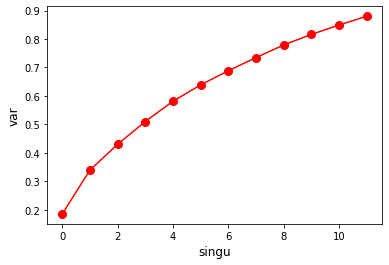

In [19]:
#from sklearn.decomposition import TruncatedSVD

#svd = TruncatedSVD(n_components=22)
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
matrix = pca.fit_transform(tf_df)


#matrix=svd.fit_transform(tf_df)
explained = pca.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms=16,color='red')
plt.xlabel('singu', fontsize=12)
plt.ylabel('var', fontsize=12)
plt.show()

In [20]:
matrix.shape

(10210, 12)

In [21]:
ratings_f1=pd.merge(movies[['movieId']], ratings_f, on="movieId", how="right")

In [22]:
ratings_f2=ratings_f1.pivot(index='movieId', columns='userId', values = 'rating').fillna(0)

In [23]:
ratings_f2.head(3)

userId,1,4,7,9,17,19,21,22,24,25,...,637,642,650,655,656,659,662,665,666,668
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,5.0,4.0,5.0,4.0,0.0,0.0,5.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,3.5,3.0,0.0,5.0,0.0,0.0,3.0
3,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.5,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [24]:
eda=pd.merge(movies, ratings, how ='left', on ='movieId')

In [25]:
eda

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,14,4.0,851766286
...,...,...,...,...,...,...
105215,148238,A Very Murray Christmas (2015),Comedy,475,3.0,1451213043
105216,148626,The Big Short (2015),Drama,458,4.0,1452014749
105217,148626,The Big Short (2015),Drama,576,4.5,1451687664
105218,148626,The Big Short (2015),Drama,668,4.5,1451148148


In [26]:
a=eda.groupby('title')['rating'].mean()
a

title
'71 (2014)                                       3.500000
'Round Midnight (1986)                           2.500000
'Til There Was You (1997)                        4.000000
'burbs, The (1989)                               3.125000
'night Mother (1986)                             3.000000
                                                   ...   
loudQUIETloud: A Film About the Pixies (2006)    4.500000
xXx (2002)                                       2.958333
xXx: State of the Union (2005)                   2.071429
¡Three Amigos! (1986)                            3.012500
À nous la liberté (Freedom for Us) (1931)        3.000000
Name: rating, Length: 10208, dtype: float64

In [27]:
short_rating=a.sort_values(ascending=False)

In [28]:
short_rating

title
Andrei Rublev (Andrey Rublyov) (1969)              5.0
Topkapi (1964)                                     5.0
Hard Core Logo (1996)                              5.0
Superman/Batman: Public Enemies (2009)             5.0
Plague Dogs, The (1982)                            5.0
                                                  ... 
Deliver Us from Evil (2014)                        0.5
You Got Served (2004)                              0.5
Leatherface: Texas Chainsaw Massacre III (1990)    0.5
Clockstoppers (2002)                               0.5
Goodbye to Language 3D (2014)                      0.5
Name: rating, Length: 10208, dtype: float64

In [29]:
b=eda.groupby('title')['rating'].count()
b.tail()

title
loudQUIETloud: A Film About the Pixies (2006)     1
xXx (2002)                                       24
xXx: State of the Union (2005)                    7
¡Three Amigos! (1986)                            40
À nous la liberté (Freedom for Us) (1931)         1
Name: rating, dtype: int64

In [30]:
new_record=pd.DataFrame()
new_record['Average_rating']=a

In [31]:
new_record['total_rating']=b

In [32]:
new_record.head()

,Average_rating,total_rating
title,,
'71 (2014),3.500,1
'Round Midnight (1986),2.500,1
'Til There Was You (1997),4.000,3
"'burbs, The (1989)",3.125,20
'night Mother (1986),3.000,1


<AxesSubplot:>

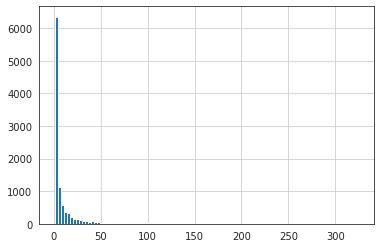

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline


new_record['total_rating'].hist(bins=100)

<AxesSubplot:>

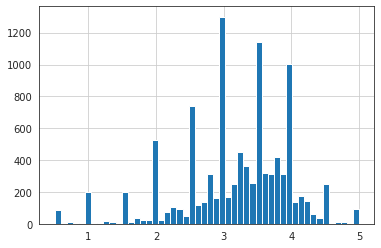

In [34]:
new_record['Average_rating'].hist(bins=50)

In [35]:
q = new_record['Average_rating'].quantile(0.10)
data2 = new_record[new_record['Average_rating']>q]

<AxesSubplot:>

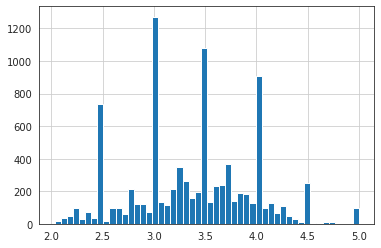

In [36]:
data2['Average_rating'].hist(bins=50)

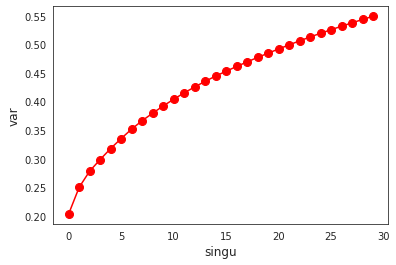

In [37]:
#from sklearn.decomposition import TruncatedSVD

#svd = TruncatedSVD(n_components=50)
#matrix2=svd.fit_transform(ratings_f2)
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
matrix2 = pca.fit_transform(ratings_f2)




matrix2_df=pd.DataFrame(matrix2,index=movies.title.tolist())
explained = pca.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms=16,color='red')
plt.xlabel('singu', fontsize=12)
plt.ylabel('var', fontsize=12)
plt.show()

In [38]:
matrix1_df=pd.DataFrame(matrix[:,0:12], index=movies.title.tolist())

In [39]:
matrix1_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
Toy Story (1995),-0.318186,0.098480,0.067279,-0.383544,-0.146270,0.198189,-0.159656,-0.302428,-0.552079,-0.027216,-0.105693,0.080217
Jumanji (1995),-0.159112,0.255829,0.173533,-0.411027,-0.169820,0.232669,-0.188681,-0.338779,-0.562778,-0.045018,-0.091289,-0.009593
Grumpier Old Men (1995),-0.488203,-0.423775,0.486466,0.289671,-0.006918,-0.070289,0.009222,0.024743,0.029817,-0.012169,-0.004661,-0.034473
Waiting to Exhale (1995),-0.104834,-0.562121,0.358681,0.234328,0.002293,-0.126725,0.014665,0.013268,0.030210,-0.046678,-0.000869,-0.041945
Father of the Bride Part II (1995),-0.684061,-0.428027,-0.319266,-0.019888,0.059513,-0.049267,-0.021258,0.051269,0.009540,0.021730,0.006625,-0.021195


In [40]:
matrix2_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Toy Story (1995),34.994118,-2.612652,-5.061574,6.912783,6.324005,4.599181,-2.643772,0.227790,2.965422,1.742472,...,-1.241894,1.540255,0.388682,3.252543,0.398202,-5.314720,-1.547848,0.348529,-0.418152,0.202035
Jumanji (1995),14.624334,1.605370,-3.911203,3.204608,3.983462,-2.449699,2.014152,-1.518813,-1.302292,0.460486,...,1.863623,-0.999673,0.968567,0.321986,-2.089994,-1.118259,-1.109360,-1.087848,0.992720,2.615842
Grumpier Old Men (1995),3.849447,-1.628284,-3.050384,-2.581694,2.234409,-1.648948,0.460750,-2.113864,-0.207889,2.495963,...,3.425076,0.553388,0.560658,0.022861,0.201275,0.180957,-0.030948,-1.582371,-0.340177,1.378459
Waiting to Exhale (1995),-0.536534,-2.188903,-1.466863,-0.399386,-0.024136,-2.312326,-1.590453,0.212795,0.938255,1.474529,...,-0.076633,0.250770,0.617013,-0.501875,-1.798849,0.518416,0.218813,1.135615,-0.353695,0.401626
Father of the Bride Part II (1995),4.083467,-1.804963,-1.688509,-1.976798,4.578106,-0.668492,-0.974743,0.414582,-0.402918,-0.337652,...,3.459721,-0.438677,-0.626155,-1.199610,-0.168543,-0.852766,-1.082809,-1.783439,1.293365,-2.430429


In [41]:
from sklearn.metrics.pairwise import cosine_similarity

In [42]:
a_1 = np.array(matrix1_df.loc['Toy Story (1995)']).reshape(1,-1)
a_2 = np.array(matrix2_df.loc['Toy Story (1995)']).reshape(1,-1)

In [43]:
score1=cosine_similarity(matrix1_df,a_1).reshape(-1)
score2=cosine_similarity(matrix2_df,a_2).reshape(-1)
hybrid = ((score1 + score2)/2.0)
dictdf= {'content':score1, 'collibrative':score2, 'hybrid':hybrid}
similar= pd.DataFrame(dictdf, index= matrix1_df.index)

In [44]:
similar.sort_values('hybrid', ascending=False, inplace=True)
similar[1:].head(10)

,content,collibrative,hybrid
Toy Story 2 (1999),1.000000,0.882573,0.941287
"Bug's Life, A (1998)",0.984536,0.854978,0.919757
Aladdin (1992),0.942932,0.855587,0.899259
Monty Python and the Holy Grail (1975),0.896206,0.900486,0.898346
Finding Nemo (2003),0.984536,0.756866,0.870701
"Monsters, Inc. (2001)",1.000000,0.741323,0.870661
Shrek (2001),0.925593,0.802527,0.864060
Jumanji (1995),0.955085,0.755187,0.855136
"Wizard of Oz, The (1939)",0.919202,0.789910,0.854556
"Lion King, The (1994)",0.867648,0.805710,0.836679
